# problem Statement:

In [ ]:
Sentiment Analysis on Restaurent Review 

# 1. Import Libraries:

In [17]:
# importing libraries 
import pandas as pd 
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from collections import Counter
from autocorrect import Speller
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.util import ngrams
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from langdetect import detect
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from googletrans import Translator
from nltk.stem.porter import PorterStemmer
from autocorrect import Speller
import yake
from rake_nltk import Rake

In [45]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from collections import Counter
from autocorrect import Speller
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from langdetect import detect
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from googletrans import Translator
from nltk.stem.porter import PorterStemmer
import yake
from rake_nltk import rake

# 2.Data Gathering:

First, we have to import pandas as we need pandas to read the dataset. Then, we will use the read_csv() command to read the dataset and create a DataFrame

In [46]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
df=df.rename (columns = {'Liked':'Star'})
df

,Review,Star
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
...,...,...
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


# Initial Preprocessing:

In [47]:
def lang_detect(df):
    lang = detect(df)
    return lang

In [48]:
df.Review[0]

'Wow... Loved this place.'

In [49]:
lang_detect(df.Review[0])

'en'

In [50]:
df['language'] = df.Review.apply(lang_detect)
df.language.unique()

array(['en', 'af', 'de', 'so', 'no', 'fr', 'nl', 'ca', 'da', 'tl', 'it',
       'ro', 'et', 'vi', 'es', 'sq'], dtype=object)

In [51]:
def lang_trans(df):
    translator = Translator()
    translated_text = translator.translate(df)
    return translated_text.text

In [52]:
lang_trans(df.Review[0])

'Wow... Loved this place.'

In [53]:
df['translated_Review'] = df.Review.apply(lang_trans)

In [55]:
final_data = df[['translated_Review','Star']]

In [56]:
final_data

,translated_Review,Star
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
...,...,...
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


# EDA

### ngrams visualization 

In [60]:

# Unigrams 
def get_ngrams(df,ngrams_range):
    fixed_text = contractions.fix(df)
    tokens = word_tokenize(fixed_text)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.isalpha()) and (word.lower() not in stopword_list) and (len(word)>2)]
    ngram_list = ngrams(clean_text,ngrams_range)
    return ngram_list

In [61]:
ngram_list = df.Review.apply(lambda x : get_ngrams(x,1))
ngram_list

0      <zip object at 0x00000200C8320780>
1      <zip object at 0x00000200C8330180>
2      <zip object at 0x00000200C8354780>
3      <zip object at 0x00000200C8113A80>
4      <zip object at 0x00000200C8291000>
                      ...                
995    <zip object at 0x00000200C85408C0>
996    <zip object at 0x00000200C8540640>
997    <zip object at 0x00000200C8540C40>
998    <zip object at 0x00000200C8541140>
999    <zip object at 0x00000200C8541800>
Name: Review, Length: 1000, dtype: object

In [62]:
final_ngram_list = []
for ngram in ngram_list:
    for val in ngram:
        final_ngram_list.append(val[0])


In [63]:
len(final_ngram_list)

5569

In [64]:
final_ngram_list

['wow',
 'loved',
 'place',
 'crust',
 'not',
 'good',
 'not',
 'tasty',
 'texture',
 'nasty',
 'stopped',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommendation',
 'loved',
 'selection',
 'menu',
 'great',
 'prices',
 'getting',
 'angry',
 'want',
 'damn',
 'pho',
 'honeslty',
 'not',
 'taste',
 'fresh',
 'potatoes',
 'like',
 'rubber',
 'could',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmer',
 'fries',
 'great',
 'great',
 'touch',
 'service',
 'prompt',
 'would',
 'not',
 'back',
 'cashier',
 'care',
 'ever',
 'say',
 'still',
 'ended',
 'wayyy',
 'overpriced',
 'tried',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberry',
 'mmmm',
 'disgusted',
 'pretty',
 'sure',
 'human',
 'hair',
 'shocked',
 'signs',
 'indicate',
 'cash',
 'highly',
 'recommended',
 'waitress',
 'little',
 'slow',
 'service',
 'place',
 'not',
 'worth',
 'time',
 'let',
 'alone',
 'vegas',
 'not',
 'like',
 'burrittos',
 'blah',
 'food',
 'amazing',
 'service',
 'also',
 'cute',
 'c

In [66]:
most_common_uni = Counter(final_ngram_list).most_common(100)
most_common_uni

[('not', 218),
 ('food', 125),
 ('place', 106),
 ('good', 95),
 ('service', 83),
 ('great', 70),
 ('back', 61),
 ('like', 46),
 ('time', 42),
 ('would', 41),
 ('really', 36),
 ('best', 30),
 ('ever', 28),
 ('also', 27),
 ('friendly', 27),
 ('never', 26),
 ('one', 26),
 ('restaurant', 25),
 ('nice', 25),
 ('amazing', 24),
 ('delicious', 23),
 ('vegas', 22),
 ('pretty', 20),
 ('came', 20),
 ('experience', 20),
 ('could', 19),
 ('staff', 19),
 ('get', 19),
 ('eat', 19),
 ('minutes', 19),
 ('definitely', 19),
 ('love', 19),
 ('even', 19),
 ('disappointed', 19),
 ('bad', 18),
 ('much', 18),
 ('got', 18),
 ('going', 18),
 ('made', 17),
 ('chicken', 17),
 ('first', 17),
 ('say', 16),
 ('think', 16),
 ('better', 16),
 ('salad', 15),
 ('stars', 15),
 ('always', 15),
 ('way', 15),
 ('well', 15),
 ('pizza', 15),
 ('menu', 14),
 ('fresh', 14),
 ('worst', 14),
 ('ordered', 14),
 ('wait', 14),
 ('steak', 14),
 ('want', 13),
 ('taste', 13),
 ('quality', 13),
 ('server', 13),
 ('went', 13),
 ('times',

In [67]:
# bigram
ngram_list = df.Review.apply(lambda x : get_ngrams(x,2))
final_ngram_list = []
for ngram in ngram_list:
    for val in ngram:
        final_ngram_list.append(" ".join([val[0],val[1]]))
most_common_bi = Counter(final_ngram_list).most_common(100)
most_common_bi

[('not good', 13),
 ('would not', 11),
 ('not back', 10),
 ('great food', 8),
 ('good food', 8),
 ('could not', 7),
 ('going back', 7),
 ('food good', 7),
 ('not like', 6),
 ('great service', 6),
 ('really good', 6),
 ('first time', 6),
 ('great place', 6),
 ('not think', 6),
 ('place not', 5),
 ('food service', 5),
 ('customer service', 5),
 ('food delicious', 5),
 ('not know', 5),
 ('not impressed', 5),
 ('food great', 5),
 ('not recommend', 5),
 ('anytime soon', 5),
 ('not worth', 4),
 ('friendly staff', 4),
 ('feel like', 4),
 ('not want', 4),
 ('bad food', 4),
 ('not much', 4),
 ('not wait', 4),
 ('never ever', 4),
 ('waste time', 4),
 ('come back', 4),
 ('food not', 4),
 ('zero stars', 4),
 ('not going', 4),
 ('not disappointed', 4),
 ('service food', 4),
 ('coming back', 4),
 ('recommend place', 4),
 ('not even', 4),
 ('another minutes', 4),
 ('not tasty', 3),
 ('like place', 3),
 ('good prices', 3),
 ('made feel', 3),
 ('every time', 3),
 ('not enjoy', 3),
 ('went back', 3),
 (

In [69]:
# Trigram
neg_data = df[df.Star==1]
ngram_list = neg_data.Review.apply(lambda x : get_ngrams(x,3))
final_ngram_list = []
for ngram in ngram_list:
    for val in ngram:
        final_ngram_list.append(" ".join([val[0],val[1],val[2]]))
most_common_tri = Counter(final_ngram_list).most_common(100)
most_common_tri
# loopholes in delivery, product quality,payment,broken product

[('come back every', 2),
 ('good things place', 2),
 ('first vegas buffet', 2),
 ('great place eat', 2),
 ('great food great', 2),
 ('food great service', 2),
 ('food good service', 2),
 ('wow loved place', 1),
 ('stopped late may', 1),
 ('late may bank', 1),
 ('may bank holiday', 1),
 ('bank holiday rick', 1),
 ('holiday rick steve', 1),
 ('rick steve recommendation', 1),
 ('steve recommendation loved', 1),
 ('selection menu great', 1),
 ('menu great prices', 1),
 ('tried cape cod', 1),
 ('cape cod ravoli', 1),
 ('cod ravoli chicken', 1),
 ('ravoli chicken cranberry', 1),
 ('chicken cranberry mmmm', 1),
 ('service also cute', 1),
 ('could care less', 1),
 ('care less interior', 1),
 ('less interior beautiful', 1),
 ('right red velvet', 1),
 ('red velvet cake', 1),
 ('velvet cake ohhh', 1),
 ('cake ohhh stuff', 1),
 ('ohhh stuff good', 1),
 ('hole wall great', 1),
 ('wall great mexican', 1),
 ('great mexican street', 1),
 ('mexican street tacos', 1),
 ('street tacos friendly', 1),
 ('t

### wordcloud generation 

In [71]:
# wordcloud generation 
def wordcloud(df,column):
    df1 = df[column].str.cat(sep=" ") # dataframe--->string (use tokenization and merge data in a single string )
    
    text = " ".join([word for word in df1.split()])
    wordcloud = WordCloud(width=700,height=500,background_color='white',min_font_size=10).generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

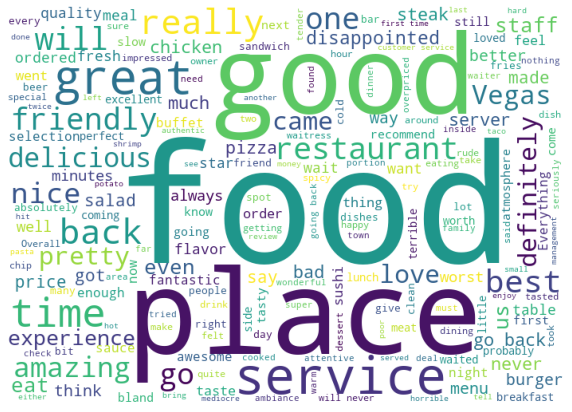

In [72]:
neg_data = final_data[final_data.Star==0]
wordcloud(final_data,'translated_Review')

# Final Preprocessing

In [73]:
def remove_blankline(df):
    clean_text=df.replace('\\n', ' ').replace('\n',' ').replace('\t', ' ').replace('\\',' ')
    return clean_text

def contraction_mapping(df):
    expanded_text=contractions.fix(df)
    return expanded_text


def handling_accented(df):
    text=unidecode(df)
    return text


stopword_list=stopwords.words('english')
stopword_list.remove('not')
stopword_list.remove('no')
stopword_list.remove('nor')
def clean_data(df):
    tokens=word_tokenize(df)
    clean_text=[word.lower() for word in tokens if(word not in punctuation) and
                (word not in stopword_list) and(len(word)>2) and (word.isalpha())]
    return clean_text


def Lemmatizetion(df):
    lemmatizer=WordNetLemmatizer()
    empty_list=[]
    for word in df:
        lemmatized_word=lemmatizer.lemmatize(word)
        empty_list.append(lemmatized_word)
    return " ".join(empty_list)


# def autocorrection(data):
#     autocorrect1 = Speller('en')
#     autocorrect1(data)
#     return autocorrect1

clean_text=df.Review.apply(remove_blankline)
clean_text=clean_text.apply(contraction_mapping)
clean_text=clean_text.apply(handling_accented)
clean_text=clean_text.apply(clean_data)
clean_text=clean_text.apply(Lemmatizetion)
# clean_text=clean_text.apply(autocorrection)
        

In [74]:
final_data = df[['translated_Review','Star']]
final_data

,translated_Review,Star
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1
...,...,...
995,I think food should have flavor and texture and both were lacking.,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go back.,0
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0


In [75]:
corpus = []
ps = PorterStemmer()
for i in range(0,1000):
    show = re.sub('[^a-zA-Z]',repl=' ', string=df['Review'][i])
    show = show.lower()
    show = show.split()
    show = [ps.stem(word) for word in show if not word in stopwords.words('english')]
    show = ' '.join(show)
    corpus.append(show)

In [76]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

# 4. Feature Engineering/ Extraction:

In [47]:
#Text To numerical conversion

# 1.  Count Vectorization

In [77]:
#1. Count Vectorizer
count_vec = CountVectorizer(stop_words='english',lowercase=True, max_features=1500)
bow = count_vec.fit_transform(final_data.translated_Review)
x_bow = bow.A # toarray,A
pd.DataFrame(x_bow,columns=count_vec.get_feature_names())

,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2.Tfidf Vectorizer

TFIDF stands for Term Frequency Inverse Document Frequency. The machine cannot understand text data. So, we need a way to convert the text data into numerical data which the machine can understand. Using the TFIDF Vectorizer, text data is transformed into feature vectors, which can be provided as input to the Machine Learning estimator. 

In [78]:
# 2. Tfidf Vectorizer
tfidf = TfidfVectorizer(stop_words='english',lowercase=True, max_features=1500)
tfidf_val = tfidf.fit_transform(final_data.translated_Review)
x_tfidf = tfidf_val.A # toarray,A
pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names())

,00,10,100,11,12,15,17,1979,20,2007,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Word2Vec

In [83]:
# 3. word2vec [[w1,w2],[]]
sent = final_data.translated_Review.to_list()
splitted_sent =[sen.split() for sen in sent ]
word_2_vec_model = Word2Vec(splitted_sent,min_count=2,window=5)
word_2_vec_model.save("word2vec.model")

In [82]:
#splitted_sent

In [84]:
sent

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn phone.',
 "Honestly it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at al

In [86]:
def vectorizer(list_of_docs,model):
    """Generate vector for all the reviews 
    list_of_docs = list_of_reviews
    model = word2vec model
    
    return 
    vector for each review"""
    vector_review = []
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size) # if we do not have vector for word or for review
        vectors = []
        for word in rew :
            if word in model.wv: # checking if model have that particular word
                try :
                    vectors.append(model.wv[word]) # array append
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors) # converting all arrays into a single array
            avg_vec = vectors.mean(axis=0) # avarage of all vectors(all words)
            vector_review.append(avg_vec)# vector of each review
        else :
            vector_review.append(zero_vector) # if vector of any review is not present we will append zero vector
    return vector_review

In [87]:
vectorized_docs = vectorizer(splitted_sent,word_2_vec_model)

In [88]:
vectorized_docs

[array([-0.0397815 ,  0.04746711,  0.00656442, -0.00445882,  0.01440065,
        -0.11020549,  0.05050804,  0.15447927, -0.05809494, -0.04310831,
        -0.02717119, -0.095604  , -0.02101531,  0.02563628,  0.02051164,
        -0.02949985,  0.03240576, -0.06886198, -0.02144177, -0.12688492,
         0.04330816,  0.02295076,  0.05587238, -0.01474117, -0.02562685,
         0.01964722, -0.03427903, -0.02752656, -0.05437441,  0.00528594,
         0.07981764, -0.00412766,  0.02382059, -0.05346641, -0.01704771,
         0.09321528,  0.03387633, -0.04073695, -0.04186068, -0.08423972,
         0.01987333, -0.0593002 , -0.04956749,  0.0121687 ,  0.06338712,
        -0.03763225, -0.02719739, -0.00276685,  0.03618619,  0.04168461,
         0.04812726, -0.065464  , -0.01157009, -0.00918528, -0.03734483,
         0.06920608,  0.0485428 , -0.014687  , -0.08276603,  0.02929983,
        -0.00882795,  0.01803   ,  0.02010872,  0.00418355, -0.08228251,
         0.06513279,  0.02939033,  0.07939715, -0.0

In [89]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-0.0397815 ,  0.04746711,  0.00656442, ..., -0.04014176,
         0.03928013, -0.01968286],
       [-0.08103186,  0.0959641 ,  0.01682062, ..., -0.07475694,
         0.06174299, -0.04013612],
       [-0.09371053,  0.11240606,  0.01942757, ..., -0.08719964,
         0.06299053, -0.04834825],
       ...,
       [-0.09109379,  0.10608085,  0.01524141, ..., -0.07680703,
         0.06393709, -0.04260661],
       [-0.07490053,  0.09233042,  0.01438169, ..., -0.06825895,
         0.05029881, -0.03857964],
       [-0.09620814,  0.11293173,  0.0195847 , ..., -0.08510298,
         0.06368342, -0.04631548]])

# Kmeans Clustering

In [90]:
def build_kmeans(cluster,x_df):
    kmeans_model = KMeans(n_clusters=cluster)
    y_pred = kmeans_model.fit_predict(x_df)
    return kmeans_model,y_pred

In [91]:
# KMeans-Count 
bow_kmeans,bow_kmeans_pred = build_kmeans(3,x_bow)

In [92]:
# KMeans-tfidf
tfidf_kmeans,tfidf_kmeans_pred = build_kmeans(3,x_tfidf)

In [93]:
# KMeans-word2vec
word2vec_kmeans,word2vec_kmeans_pred = build_kmeans(3,x_emb)

# Evaluation

In [94]:
print(f"Silhouette Score of KMeans_Count  : {silhouette_score(x_bow,bow_kmeans_pred)}")
print(f"Silhouette Score of KMeans_tfidf  : {silhouette_score(x_tfidf,tfidf_kmeans_pred)}")
print(f"Silhouette Score of KMeans_word2vec  : {silhouette_score(x_emb,word2vec_kmeans_pred)}")

Silhouette Score of KMeans_Count  : 0.054042568441097984
Silhouette Score of KMeans_tfidf  : 0.011365667233301019
Silhouette Score of KMeans_word2vec  : 0.5087337012684356


# Visualizer:

In [95]:
def visualizer_silhouette(x_df, model,title1):
    visualizer = SilhouetteVisualizer(model,colors='yellowbrick')
    visualizer.fit(x_df)
    plt.title(f"Silhouette Visualizer with {title1}")

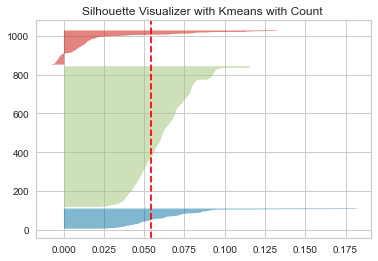

In [96]:
visualizer_silhouette(x_bow,bow_kmeans,"Kmeans with Count ")

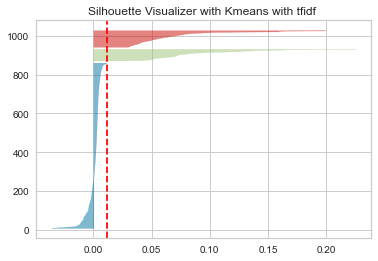

In [97]:
visualizer_silhouette(x_tfidf,tfidf_kmeans,"Kmeans with tfidf ")

The value of n_clusters as 1 looks to be suboptimal for the given data due to the following reasons: Presence of clusters with below average silhouette scores Wide fluctuations in the size of the silhouette plots.

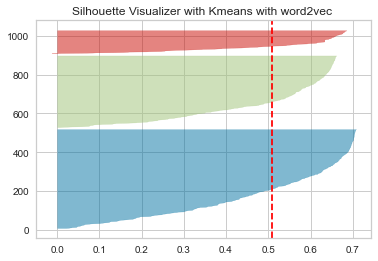

In [98]:
visualizer_silhouette(x_emb,word2vec_kmeans,"Kmeans with word2vec ")

The value of1,2,3rd for n_clusters looks to be optimal one. The silhouette score for each cluster is above average silhouette scores. Also, the fluctuation in size is similar. The thickness of the silhouette plot representing each cluster also is a deciding point. For plot with n_cluster plot 3, the thickness is more uniform than the plot with n_cluster as 2  with one cluster thickness much more than the other. Thus, one can select the optimal number of clusters as 3.

For plot with n_cluster 3rd plot, the thickness is more uniform than the plot with n_cluster as plot 2, 3rd plot with one cluster thickness much more/less than the other. Thus, one can select the optimal number of clusters as 3.

In [99]:
df.Star.unique()

array([1, 0], dtype=int64)

# Creating Target colum

In [100]:
# creating target column with help of other columns 
def create_target_column(df):
    if df==1:
        return "Positive"
    elif df==0:
        return "Negative"
    else:
        pass
   

In [101]:
final_data["Target"] =final_data.Star.apply(create_target_column)

In [102]:
final_data

,translated_Review,Star,Target
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Positive
4,The selection on the menu was great and so were the prices.,1,Positive
...,...,...,...
995,I think food should have flavor and texture and both were lacking.,0,Negative
996,Appetite instantly gone.,0,Negative
997,Overall I was not impressed and would not go back.,0,Negative
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0,Negative


# Root cause Analysis

# YAKE

In [104]:
import yake
from rake_nltk import Rake
def yake_extractor(df):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(df)
    keyword_list =  []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list

In [106]:
neg_data = final_data[final_data.Target=="Negative"]

In [107]:
keywords=neg_data.translated_Review.apply(yake_extractor) #we havento do yake and rake on negative data only in root cause analysis

In [108]:
#keyowords_yake

In [109]:
#keywords from 1st review
#keywords[0]#it gives stop keyphrases that it have

In [110]:
final_data.translated_Review[0]

'Wow... Loved this place.'

In [111]:
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('food', 56),
 ('place', 48),
 ('back', 37),
 ('service', 34),
 ('good', 22),
 ('time', 19),
 ('minutes', 16),
 ('bad', 15),
 ('disappointed', 13),
 ('eat', 12),
 ('slow', 10),
 ('restaurant', 9),
 ('worst', 9),
 ('times', 9),
 ('wait', 9),
 ('flavor', 9),
 ('pretty', 8),
 ('salad', 8),
 ('bland', 8),
 ('terrible', 8),
 ('Vegas', 7),
 ('feel', 7),
 ('eating', 7),
 ('meat', 7),
 ('bit', 7),
 ('rude', 7),
 ('quality', 7),
 ('coming', 7),
 ('give', 7),
 ('impressed', 7),
 ('cold', 7),
 ('taste', 6),
 ('made', 6),
 ('people', 6),
 ('chicken', 6),
 ('experience', 6),
 ('sushi', 6),
 ('lunch', 6),
 ('ordered', 6),
 ('burger', 6),
 ('felt', 6),
 ('stars', 6),
 ('money', 6),
 ('overpriced', 5),
 ('worth', 5),
 ('asked', 5),
 ('tables', 5),
 ('table', 5),
 ('sick', 5),
 ('horrible', 5),
 ('tasteless', 5),
 ('poor', 5),
 ('mediocre', 5),
 ('management', 5),
 ('waited', 5),
 ('night', 5),
 ('order', 5),
 ('waiting', 5),
 ('Food', 5),
 ('recommend', 5),
 ('disappointment', 5),
 ('anytime', 5),
 (

In [112]:
text=final_data.translated_Review[0]
text

'Wow... Loved this place.'

In [113]:
#for finding cosine similarity
# from sklearn.metrics.pairwise import cosine_similarity

In [114]:
# keywords_yake=neg_data.translated_review.apply(yake_extractor)
# keywords_yake

In [ ]:
# keywords_yake[0]

# RAKE

In [115]:
import yake
from rake_nltk import Rake

In [116]:
rake_extractor=Rake()
rake_extractor.extract_keywords_from_text(text)
keywords=rake_extractor.get_ranked_phrases()


In [117]:
text #in rake it only removes punctuatons from the text

'Wow... Loved this place.'

In [118]:
keywords

['wow ...', 'place', 'loved']

In [119]:
keyowords_yake #it gives almost all keyphreses

NameError: name 'keyowords_yake' is not defined

In [120]:
text

'Wow... Loved this place.'

# Ontology creation¶

In [121]:
# #find vector for each and evry keyphreses from word2vec
 
# ontology_dict={}#similar put it in dict from cosine similarity
# for i, keyphrases in enumerate(keyphrase_list):
#     ontology_dict[i]=[keyphrases] #similar keyphreses we get here
#     #damaged product={}}

In [122]:
final_data

,translated_Review,Star,Target
0,Wow... Loved this place.,1,Positive
1,Crust is not good.,0,Negative
2,Not tasty and the texture was just nasty.,0,Negative
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1,Positive
4,The selection on the menu was great and so were the prices.,1,Positive
...,...,...,...
995,I think food should have flavor and texture and both were lacking.,0,Negative
996,Appetite instantly gone.,0,Negative
997,Overall I was not impressed and would not go back.,0,Negative
998,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0,Negative


In [123]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   translated_Review  1000 non-null   object
 1   Star               1000 non-null   int64 
 2   Target             1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [124]:
final_data.describe()

,Star
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


It will give total count, mean, standard deviation, minimum value, maximum value, 25% of data, 50% of data, 75% of data.

# Column 1: translated_Review

In [125]:
final_data['translated_Review'].value_counts()

I would not recommend this place.                                                                                                         2
I love this place.                                                                                                                        2
I won't be back.                                                                                                                          2
The food was terrible.                                                                                                                    2
Wow... Loved this place.                                                                                                                  1
                                                                                                                                         ..
The burger... I got the "Gold Standard" a $17 burger and was kind of disappointed.                                                        1
OMG, the food was de

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df['Review']=encoder.fit_transform(df['Review'])

# Column 3: Star

In [126]:
final_data['Star'].value_counts()

1    500
0    500
Name: Star, dtype: int64

### Visualizations

<AxesSubplot:xlabel='Star', ylabel='count'>

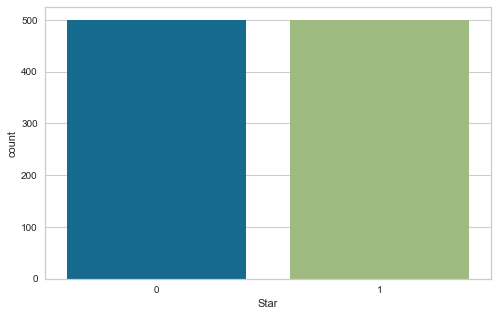

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(x=final_data.Star)

Here we used the seaborn library to visualize the data frame. This is a count plot where it counts the entries of the column and plots it.

# Column 3: Target

In [128]:
final_data['Target'].value_counts()

Positive    500
Negative    500
Name: Target, dtype: int64

value_counts() method gives the number of times the particular value repeated in that column through the data frame.

In [129]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
final_data['Target']=encoder.fit_transform(final_data['Target'])

# Creating the Bag-of-Word model

This count vectorizer transforms the text into a vector based on the count of the words like the number of times the word is repeated in the sentence.

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
cv=CountVectorizer(max_features=1000)

In [101]:
# from gensim.models import Word2Vec
# import pickle
# word_2_vec = Word2Vec(splitted_sent,min_count=2,window=5)
# word_2_vec.save("word2vec.pkl")


In [131]:
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, 1].values

In [132]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# Creating a pickle file for the CountVectorizer

In [134]:
import pickle
pickle.dump(cv, open('transform.pkl', 'wb'))

# Splitting the Datasedt into Training set and Test set

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

In [137]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


In [266]:
#from sklearn.naive_bayes import MultinomialNB

In [270]:
# c = MultinomialNB(alpha=0.2)
# c.fit(X_train, y_train)

In [269]:
# c.score(X_test,y_test)

# Model 1: Naive Bayse

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other

# Gausian NB

In [138]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [140]:
# Evaluation on Testing Data

y_pred = gnb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[58 42]
 [18 82]]
Accuracy : 0.7
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.58      0.66       100
           1       0.66      0.82      0.73       100

    accuracy                           0.70       200
   macro avg       0.71      0.70      0.70       200
weighted avg       0.71      0.70      0.70       200



In [141]:
# Evaluation on Training Data

y_pred_train = gnb_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[304  96]
 [  0 400]]
Accuracy : 0.88
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       400
           1       0.81      1.00      0.89       400

    accuracy                           0.88       800
   macro avg       0.90      0.88      0.88       800
weighted avg       0.90      0.88      0.88       800



# 2. MultinomialNB

In [142]:
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [120]:
# Evaluation on Testing Data

y_pred = mnb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[79 21]
 [20 80]]
Accuracy : 0.795
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.79      0.79       100
           1       0.79      0.80      0.80       100

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



Precision – What percent of your predictions were correct?
Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.
Precision = TP/(TP + FP)=
Precision: Out of all the sentiments that the model predicted would get positive, only 79% actually did.

Recall – What percent of the positive cases did you catch? 
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.
recall=TP/(TP+FN)
Recall: Out of all the sentiments that actually did get positive, the model only predicted this outcome correctly for 80% of those sentiments.


F1 score – What percent of positive predictions were correct? 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
F1 Score = 2*(Recall * Precision) / (Recall + Precision)



F1 Score: This value is calculated as:

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
F1 Score: 2 * (.79 * .80) / (.79 + .80)
F1 Score: 0.80.

Since this value very close to 1, it tells us that the model does a good job of predicting sentiments wether the positive or negative.

In [460]:
#for class 1
#f1_score=2*(0.80*0.79)/(0.80+0.79)=0.7949685534591197


#for class2
# f1_score=2*(0.79*0.80)/(0.79+0.80)=0.7949685534591197
# f1_score

In [143]:
2*(0.80*0.79)/(0.80+0.79)

0.7949685534591197

In [144]:
2*(0.79*0.80)/(0.79+0.80)

0.7949685534591197

In [145]:
# Evaluation on Training Data

y_pred_train = mnb_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[374  26]
 [ 28 372]]
Accuracy : 0.9325
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       400
           1       0.93      0.93      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



# 3. BernoulliNB

In [146]:
bnb_model = BernoulliNB(alpha=0.2)
bnb_model.fit(X_train, y_train)

BernoulliNB(alpha=0.2)

In [147]:
# Evaluation on Testing Data

y_pred = bnb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[78 22]
 [22 78]]
Accuracy : 0.78
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       100
           1       0.78      0.78      0.78       100

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



In [148]:
# Evaluation on Training Data

y_pred_train = bnb_model.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

Confusion Matrix :
 [[370  30]
 [ 28 372]]
Accuracy : 0.9275
Classification Report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       400
           1       0.93      0.93      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



# Model 2: Support Vector Machin

In [149]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

# Evaluation

In [150]:
#evation on testing data
y_pred = svm_clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[92  8]
 [39 61]]
********************************************************************************
Accuracy : 0.765
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.70      0.92      0.80       100
           1       0.88      0.61      0.72       100

    accuracy                           0.77       200
   macro avg       0.79      0.77      0.76       200
weighted avg       0.79      0.77      0.76       200



In [151]:
#evaluation on training data
y_pred_train = svm_clf.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[390  10]
 [ 25 375]]
********************************************************************************
Accuracy : 0.95625
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       400
           1       0.97      0.94      0.96       400

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



# Hyperparameter Tuning

In [152]:
svm_clf = SVC()

hyperparameters = {
    "C" : np.arange(1,50),
    "kernel" : ['linear', 'poly', 'rbf', 'sigmoid']
                    }
gscv_svm_clf = GridSearchCV(svm_clf,hyperparameters ,cv = 5)
gscv_svm_clf.fit(X_train, y_train)
gscv_svm_clf.best_estimator_

SVC(C=1, kernel='sigmoid')

# Evaluation after Hyperparameter Tuning

In [153]:
svm_clf = SVC(C=1, kernel='sigmoid')
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='sigmoid')

# Model Evaluation after Tuning

In [154]:
#evaluation on test data
y_pred = svm_clf.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[88 12]
 [31 69]]
********************************************************************************
Accuracy : 0.785
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.74      0.88      0.80       100
           1       0.85      0.69      0.76       100

    accuracy                           0.79       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.80      0.79      0.78       200



In [155]:
#evaluation on train data
y_pred_train = svm_clf.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)

accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy :',accuracy)

print("*"*80)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[357  43]
 [ 83 317]]
********************************************************************************
Accuracy : 0.8425
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       400
           1       0.88      0.79      0.83       400

    accuracy                           0.84       800
   macro avg       0.85      0.84      0.84       800
weighted avg       0.85      0.84      0.84       800



# Predict the Test Results

In [156]:
y_pred=mnb_model.predict(X_test)

In [157]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

# Evaluate the Model

In [158]:
# message=["Congratulations on building your first Sentiment Analysis model! You're going great!"]
# message=tfidf.transform(message).toarray()
# mnb_model.predict(message)[0]

In [159]:
print("Accuracy score of MNB is:", accuracy_score(y_pred,y_test))

Accuracy score of MNB is: 0.795


## plot of accuracies using visualizetion

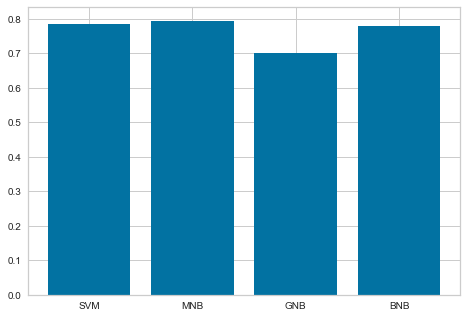

In [160]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['SVM', 'MNB', 'GNB','BNB']
accuracy = [0.785,0.795,0.7, 0.78]
ax.bar(models,accuracy)
plt.show()

# Save the Model

In [161]:
pickle.dump(mnb_model, open(' restaurant_review.pkl', 'wb'))

## Prediction of New Reviews using the Model

In [162]:
# def predict_sentiment(text):
#     tw = token.texts_to_sequences([text])
#     tw = pad_sequences(tw,maxlen=200)
#     prediction = int(mnb_model.predict(tw).round().item())
#     print("Predicted label: ", sentiment_label[1][prediction])
# test_sentence1 = "hello!!Love Your Food"
# predict_sentiment(test_sentence1)
# test_sentence2 = "omg!!it was too spice and i asked you don't add too much "
# predict_sentiment(test_sentence2)

## Conclusion